In [4]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


# Interpolation examples

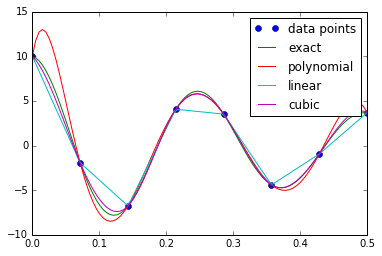

In [6]:
import numpy as np
from scipy.interpolate import interp1d, barycentric_interpolate
import pylab

#parameters
A, nu, k = 10, 4, 2

#function for creating the data points to be interpolated
def f(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

#create the data points to be interpolated
xmax, nx = 0.5, 8
x = np.linspace(0, xmax, nx)
y = f(x, A, nu, k)

#generate the points where we want to evaluate the interpolating functions
x0 = np.linspace(0, xmax, 100)

#polynomial interpolation - this gives vector y where the polynomial is already evaluated
y0 = barycentric_interpolate(x, y, x0)

# splines: linear and cubic. Note that these give you a FUNCTION to be evaluated 
# at the desired  points
f_linear  = interp1d(x, y)
f_cubic   = interp1d(x, y, kind='cubic')

#plot all results and the original data
pylab.plot(x, y, 'o', label='data points')
pylab.plot(x0, f(x2, A, nu, k), label='exact')
pylab.plot(x0, y0, label='polynomial')
pylab.plot(x0, f_linear(x0), label='linear')
pylab.plot(x0, f_cubic(x0), label='cubic')
pylab.legend()
pylab.show()

# Example of fitting

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import pylab 

#define the function to be fitted (here an exponantial) with some free parameters - a,b,c
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

# set up the data points
x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)

#introduce some 'noise' into the data
yn = y + 0.2*np.random.normal(size=len(x))

#calculate the best fit parameters (and covariance matrix)
popt, pcov = curve_fit(func, x, yn)

#print results
print('fitting parameters',popt)
print('covariance matrix',pcov)

('fitting parameters', array([ 2.41432843,  1.09613787,  0.42004686]))
('covariance matrix', array([[ 0.01507639,  0.00427259, -0.00151673],
       [ 0.00427259,  0.01801126,  0.00729992],
       [-0.00151673,  0.00729992,  0.00467481]]))


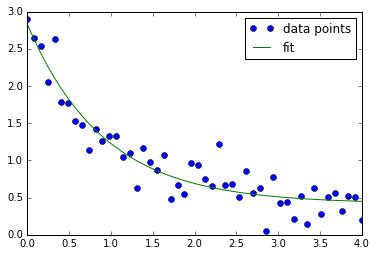

In [20]:
#plot the data and results
pylab.plot(x,yn,'o',label='data points')
pylab.plot(x,popt[0]*exp(-popt[1]*x)+popt[2],label='fit')
pylab.legend()
pylab.show()
